# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#### Importing libraries and reading data

In [650]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [651]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## Data cleaning and preparation

In [652]:
#Check for 1 unique value columns
print(df.nunique())

mobile_number           99999
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
last_date_of_month_9        1
arpu_6                  85681
arpu_7                  85308
arpu_8                  83615
arpu_9                  79937
onnet_mou_6             24313
onnet_mou_7             24336
onnet_mou_8             24089
onnet_mou_9             23565
offnet_mou_6            31140
offnet_mou_7            31023
offnet_mou_8            30908
offnet_mou_9            30077
roam_ic_mou_6            6512
roam_ic_mou_7            5230
roam_ic_mou_8            5315
roam_ic_mou_9            4827
roam_og_mou_6            8038
roam_og_mou_7            6639
roam_og_mou_8            6504
roam_og_mou_9            5882
loc_og_t2t_mou_6        13539
                        ...  
arpu_2g_9                6795
night_pck_user_6            2
night_pck_

In [653]:
#checking the single unique values column wise
print(df.loc[:,list(df.nunique()==1)].columns)

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')


In [654]:
#Dropping the single value columns as they wouldn't affect the model
list_to_remove = list(df.loc[:,list(df.nunique()==1)].columns)
df.drop(list_to_remove,axis=1,inplace =True)

In [655]:
#Check the dataset
print((df.isnull().sum()/len(df.index)) *100.0)
df.shape

mobile_number        0.000000
arpu_6               0.000000
arpu_7               0.000000
arpu_8               0.000000
arpu_9               0.000000
onnet_mou_6          3.937039
onnet_mou_7          3.859039
onnet_mou_8          5.378054
onnet_mou_9          7.745077
offnet_mou_6         3.937039
offnet_mou_7         3.859039
offnet_mou_8         5.378054
offnet_mou_9         7.745077
roam_ic_mou_6        3.937039
roam_ic_mou_7        3.859039
roam_ic_mou_8        5.378054
roam_ic_mou_9        7.745077
roam_og_mou_6        3.937039
roam_og_mou_7        3.859039
roam_og_mou_8        5.378054
roam_og_mou_9        7.745077
loc_og_t2t_mou_6     3.937039
loc_og_t2t_mou_7     3.859039
loc_og_t2t_mou_8     5.378054
loc_og_t2t_mou_9     7.745077
loc_og_t2m_mou_6     3.937039
loc_og_t2m_mou_7     3.859039
loc_og_t2m_mou_8     5.378054
loc_og_t2m_mou_9     7.745077
loc_og_t2f_mou_6     3.937039
                      ...    
arpu_2g_9           74.077741
night_pck_user_6    74.846748
night_pck_

(99999, 210)

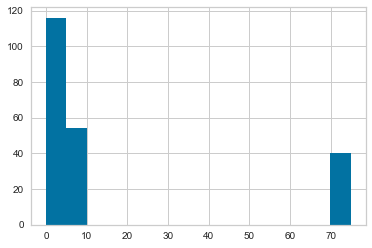

In [656]:
#Chwck how many null value percentage distribution in columns
hist = ((df.isnull().sum()/len(df.index)) *100.0).hist(bins=15)

In [657]:
#There are many columns with high Nan values, let's get the names of columns having greater than 15%
high_null = df.loc[:,list((df.isnull().sum()/len(df.index))>0.15)].columns
print(len(high_null))
print(high_null)

40
Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')


In [658]:
#We should make new column for total_data_rech_amt using the total_rech_data_6/7/8 * av_rech_amt_data_6/7/8
#but first let's impute the empty with 0's by assuming that no recharge is done for empty values
#similarly for fb_user_6/7/8
df['total_rech_data_6'].fillna(0,inplace=True)
df['total_rech_data_7'].fillna(0,inplace=True)
df['total_rech_data_8'].fillna(0,inplace=True)
df['av_rech_amt_data_6'].fillna(0,inplace=True)
df['av_rech_amt_data_7'].fillna(0,inplace=True)
df['av_rech_amt_data_8'].fillna(0,inplace=True)
df['fb_user_6'].fillna(0,inplace=True)
df['fb_user_7'].fillna(0,inplace=True)
df['fb_user_8'].fillna(0,inplace=True)
len(df.loc[:,list((df.isnull().sum()/len(df.index))>0.15)].columns)

31

In [659]:
#create columns for total_rech_amt
df['total_data_rech_amt_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_data_rech_amt_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
df['total_data_rech_amt_8'] = df['total_rech_data_8'] * df['av_rech_amt_data_8']
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212

In [660]:
#We should remove the columns as below
to_drop=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9',
        'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_8','count_rech_3g_7','count_rech_3g_6',
         'total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7',
         'av_rech_amt_data_8','max_rech_data_9','max_rech_data_8','max_rech_data_7','max_rech_data_6']
df.drop(to_drop,axis=1,inplace =True)

In [661]:
high_null = df.loc[:,list((df.isnull().sum()/len(df.index))>0.15)].columns
print(len(high_null))
print(high_null)

17
Index(['total_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9',
       'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9',
       'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_9'],
      dtype='object')


In [662]:
#Let's remove these columns as well
df.drop(high_null,axis=1,inplace =True)

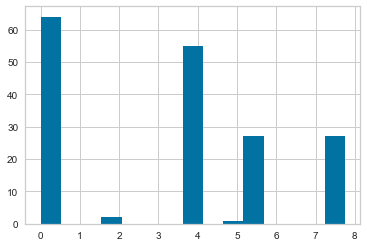

In [663]:
#Check how many null value percentage distribution in columns
hist = ((df.isnull().sum()/len(df.index)) *100.0).hist(bins=15)

In [664]:
#now we only have max ~8% null values in any column, we can proceed to move furthur

#print column names and dtypes
print(list(df.columns),'\n')
print(df.info())

['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mo

In [665]:
#We can drop columns like date_of_last_rech_* because they wont give much info, we can get those info whether the
#customer recharged last month  using total/max/number of recharges in respective month. When did the user recharge
#won't affect much

#also the column mobile number can be dropped
df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
        'mobile_number'],axis=1,inplace =True)

## Filtering high profile customers

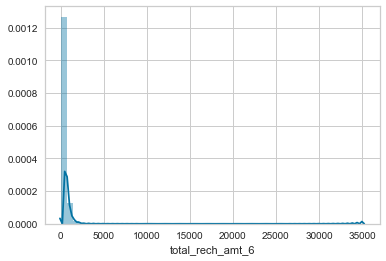

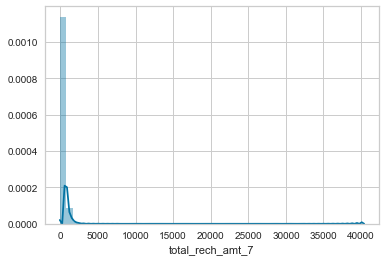

In [666]:
#analysing the distribution of recharge amounts in months 6 and 7
sns.distplot(df['total_rech_amt_6'])
plt.show()
sns.distplot(df['total_rech_amt_7'])
plt.show()

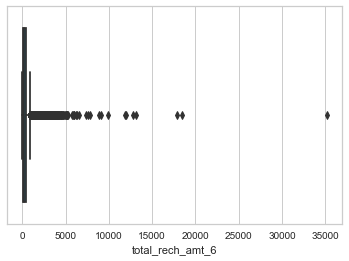

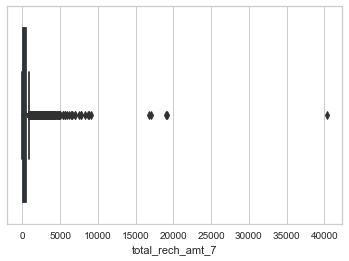

In [667]:
sns.boxplot(df['total_rech_amt_6'])
plt.show()
sns.boxplot(df['total_rech_amt_7'])
plt.show()

In [668]:
#we should check the number of nulls in the total_rech_amt_6/7 columns
(df[['total_rech_amt_6','total_rech_amt_7']].isnull().sum()/len(df.index))*100

total_rech_amt_6    0.0
total_rech_amt_7    0.0
dtype: float64

In [669]:
#since there aren't any nulls, we can continue to find the avg. of recharge amounts(including data) in first 2 months
df['total_rech_amt']=((df['total_rech_amt_6']+df['total_rech_amt_7'])/2)+((df['total_data_rech_amt_6']+df['total_data_rech_amt_7'])/2)
df['total_rech_amt']

0         559.0
1         306.0
2         241.5
3         270.0
4         301.0
5          60.0
6         360.5
7        1185.0
8         696.0
9         284.5
10          0.0
11        183.0
12        110.0
13        380.0
14         50.0
15        343.0
16        459.0
17        408.0
18         45.0
19        378.0
20        343.5
21        640.0
22        142.5
23        583.0
24        385.0
25        311.0
26        154.0
27         30.0
28         96.5
29         98.0
          ...  
99969     281.0
99970     691.0
99971     165.0
99972       0.0
99973     113.5
99974     465.0
99975      82.0
99976     244.5
99977      90.0
99978       0.0
99979      55.0
99980     354.5
99981     564.0
99982     154.0
99983     195.0
99984     618.5
99985      48.5
99986     864.0
99987     193.5
99988     544.0
99989     145.0
99990     210.0
99991     160.0
99992     120.0
99993       0.0
99994      85.0
99995     110.0
99996      98.5
99997    1602.0
99998     432.0
Name: total_rech_amt, Le

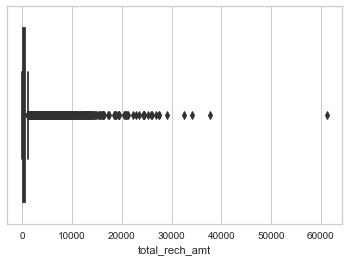

In [670]:
sns.boxplot(df['total_rech_amt'])

In [671]:
#filtering out the high-value customers as those who are top 70 percentiles of avg recharge in first 2 months
print(np.percentile(df['total_rech_amt'], 70))
df_high = df[(df['total_rech_amt']>np.percentile(df['total_rech_amt'], 70))]
df_high.head()

478.0


,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_amt
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.5,0.0,6.50,NaN,0.0,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [672]:
df_high.shape

(29953, 172)

## Mark the churners

In [673]:
#Let's now mark the churners based on who have not made any calls (either incoming or outgoing)
#and have not used mobile internet even once in the churn phase
df_high['churned']=0
df_high.loc[(df_high['total_ic_mou_9']==0) & (df_high['total_og_mou_9']==0) & 
            (df_high['vol_2g_mb_9']==0) & (df_high['vol_3g_mb_9']==0),['churned']]=1

df_high['churned']

0        1
7        1
8        0
21       0
23       0
33       0
38       0
41       0
48       0
53       0
56       0
57       0
61       0
67       1
69       0
73       0
77       0
86       1
87       0
91       0
92       0
96       0
101      0
102      0
103      0
104      0
105      0
111      1
115      0
124      0
        ..
99896    0
99899    0
99902    0
99903    0
99904    0
99921    0
99922    0
99923    0
99924    0
99925    0
99927    0
99929    0
99931    0
99935    0
99937    0
99939    0
99941    0
99942    0
99947    0
99955    0
99957    0
99959    0
99963    0
99965    0
99970    0
99981    0
99984    0
99986    0
99988    0
99997    0
Name: churned, Length: 29953, dtype: int64

In [674]:
#removing the 9 month columns
no_ninth_month = [x for x in df_high.columns if x[-2:]!='_9']
no_ninth_month.remove('sep_vbc_3g')
df_c = df_high[no_ninth_month]
print(df_c.shape)
df_c.head()

(29953, 132)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_amt,churned
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,559.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,0.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.0,354.0,207.0,696.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04

In [675]:
#checking the number of empty values in columns
print(max((df_c.isnull().sum()/len(df_c.index) )*100))
cc=list(df_c.loc[:,list((df_c.isnull().sum()/len(df_c.index) )*100 > 0)].columns)
cc

3.91279671485327


['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

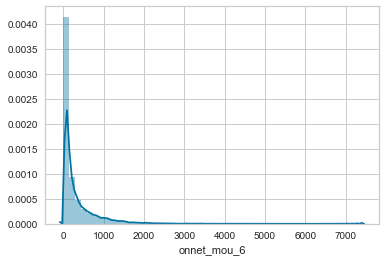

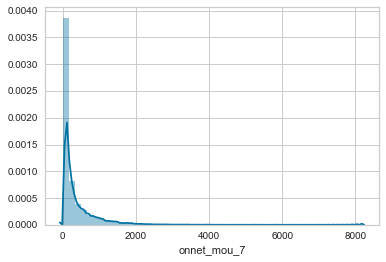

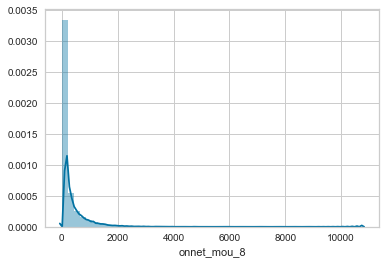

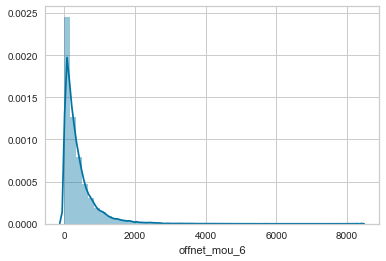

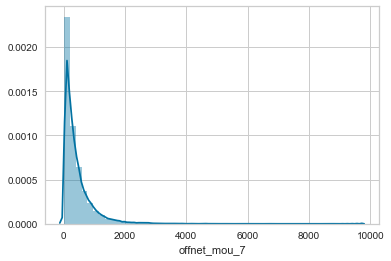

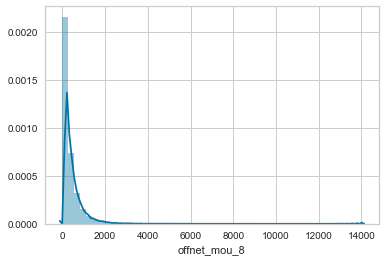

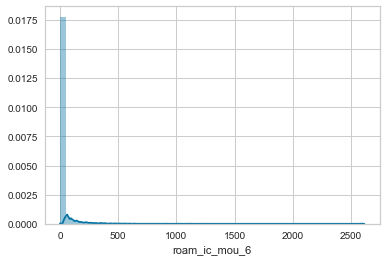

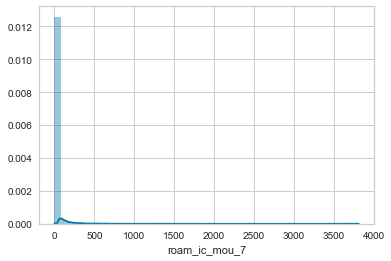

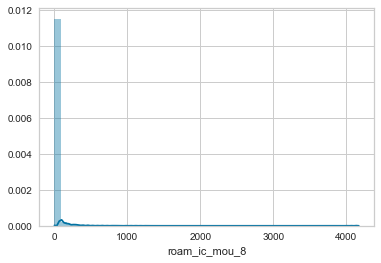

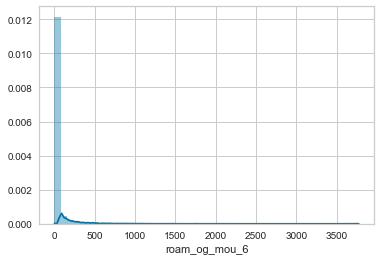

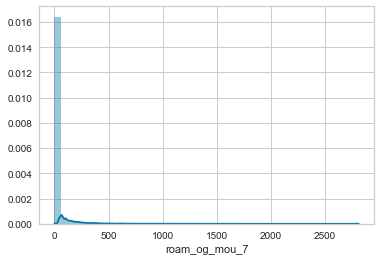

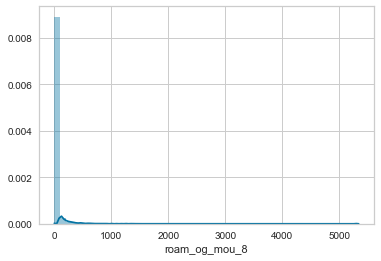

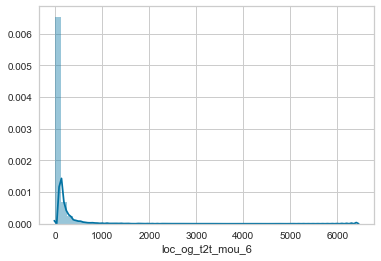

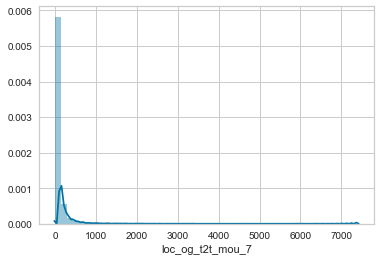

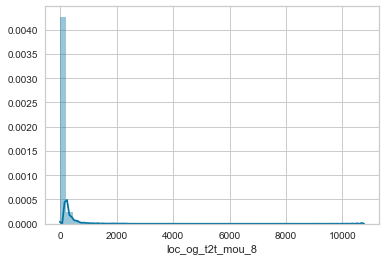

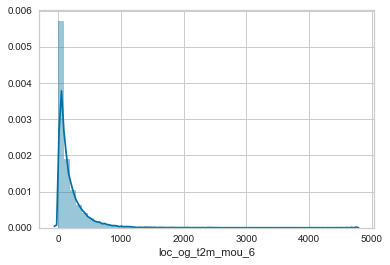

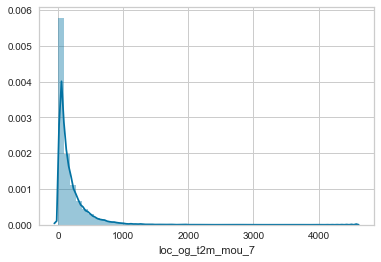

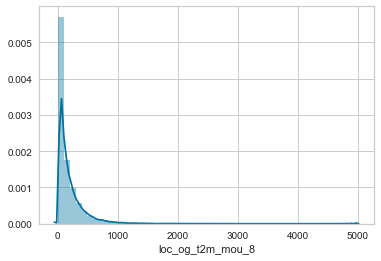

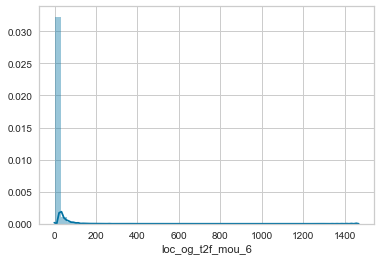

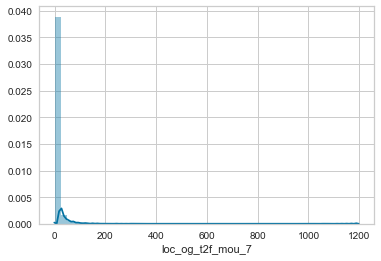

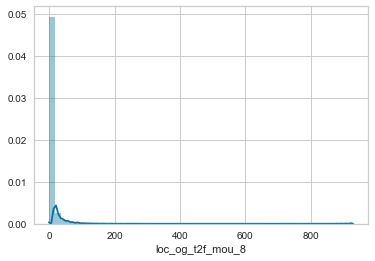

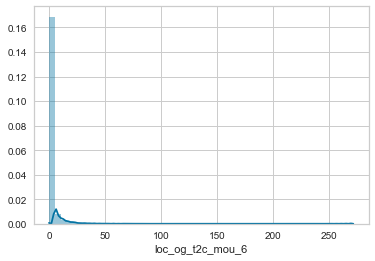

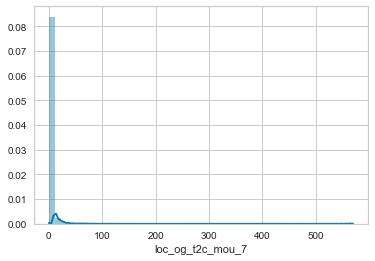

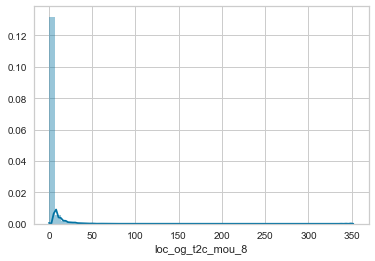

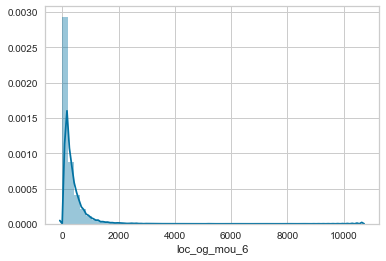

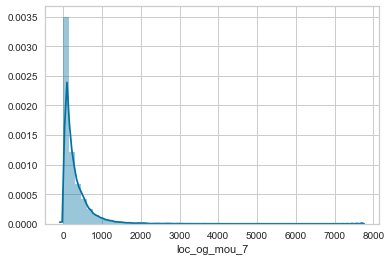

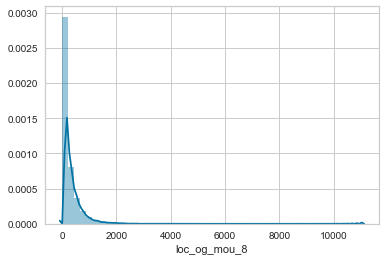

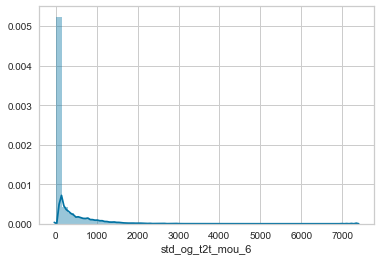

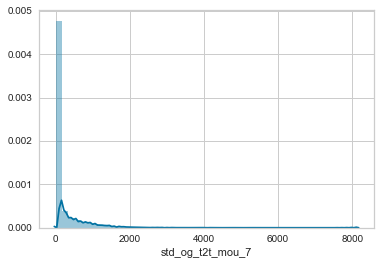

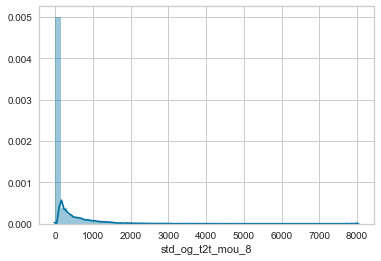

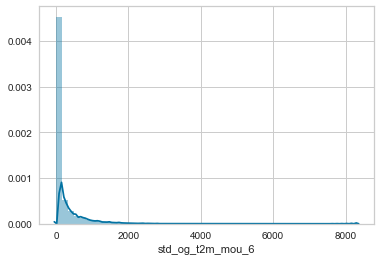

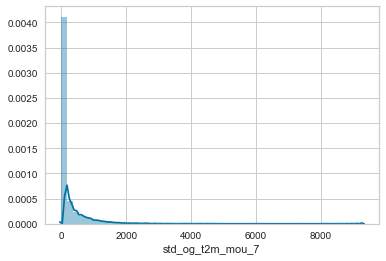

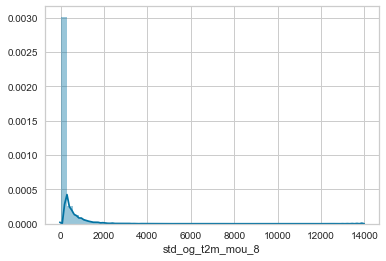

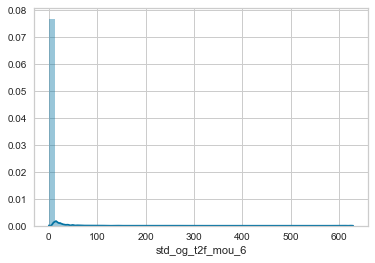

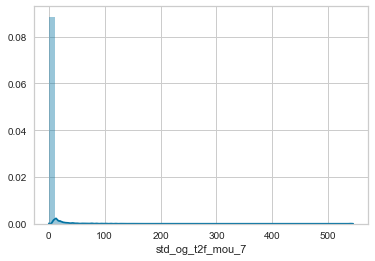

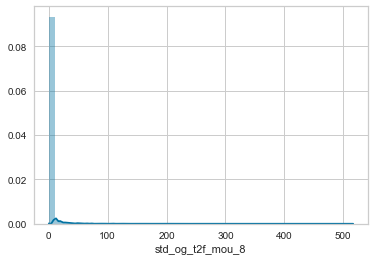

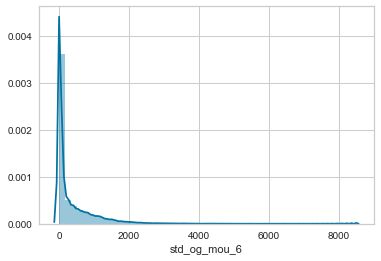

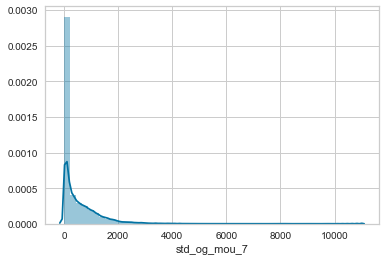

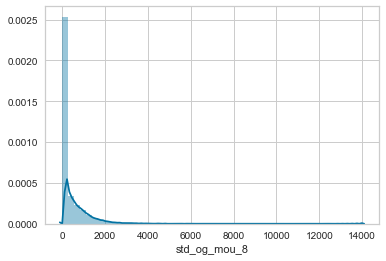

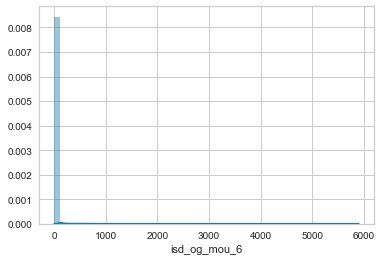

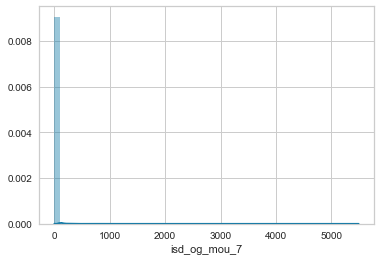

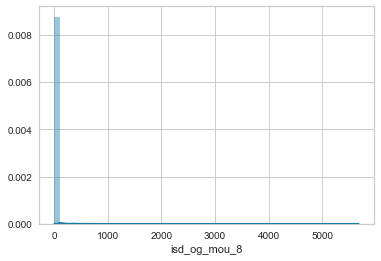

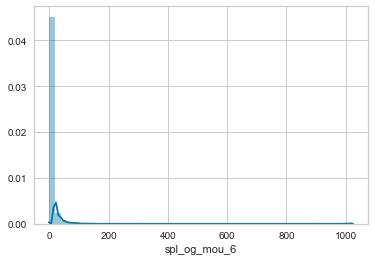

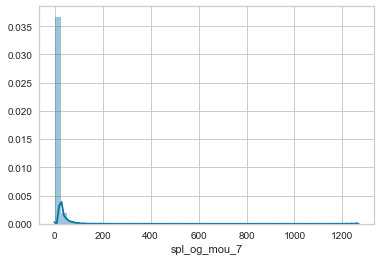

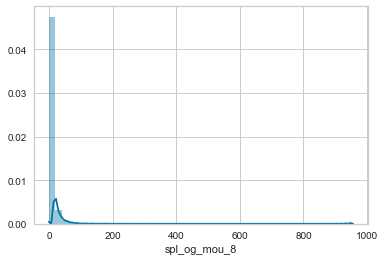

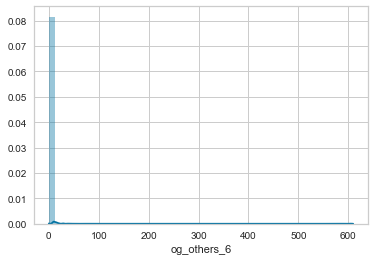

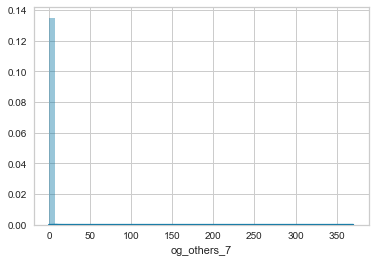

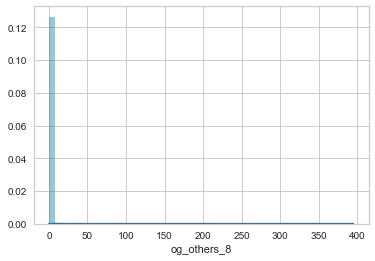

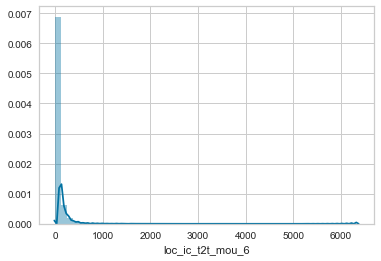

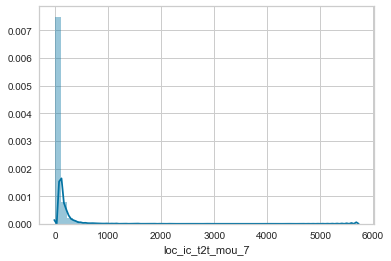

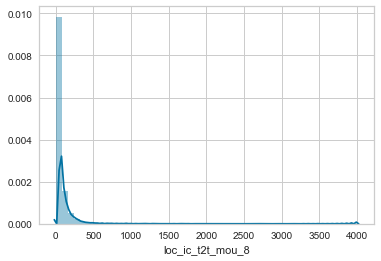

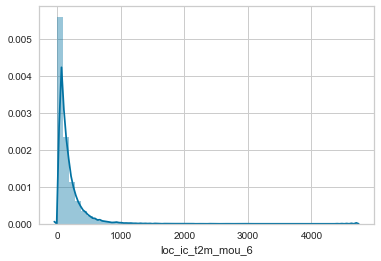

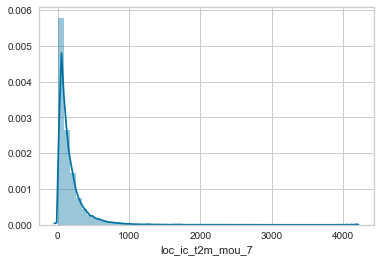

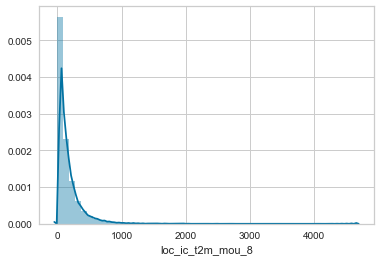

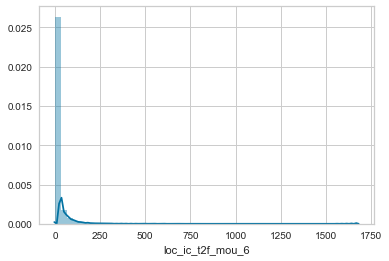

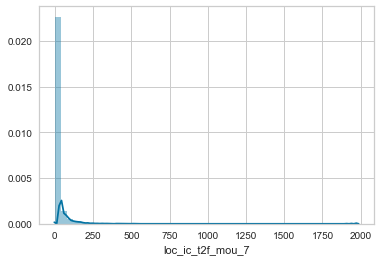

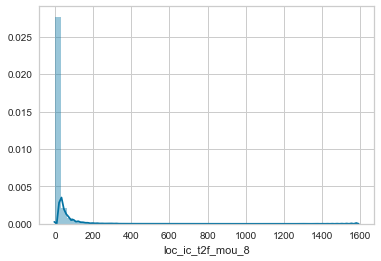

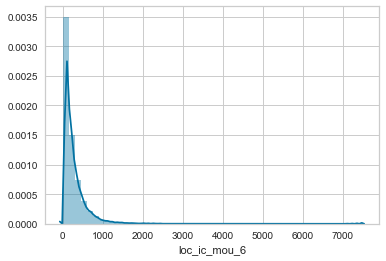

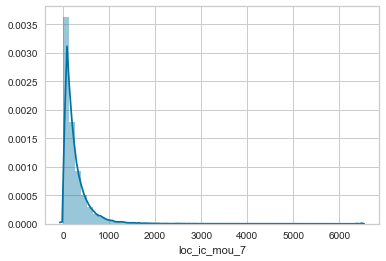

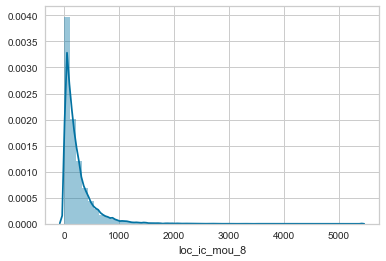

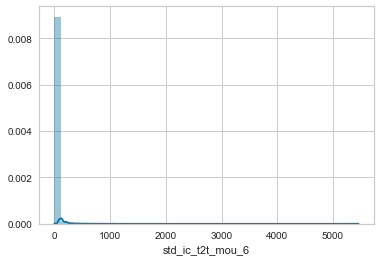

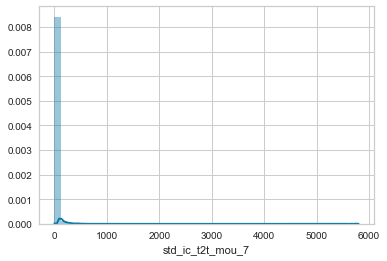

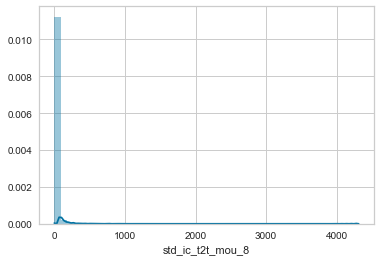

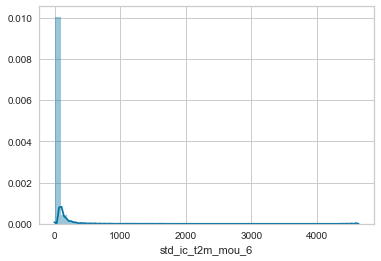

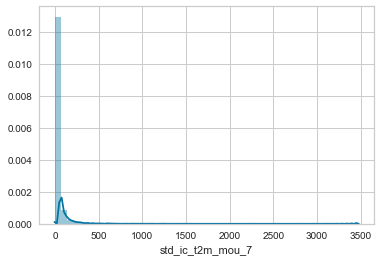

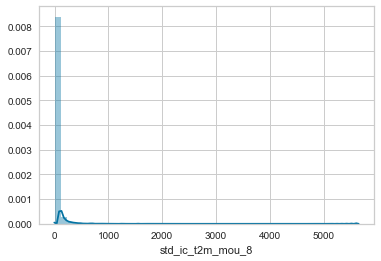

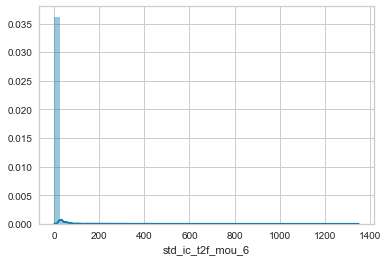

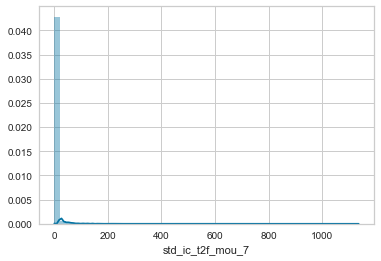

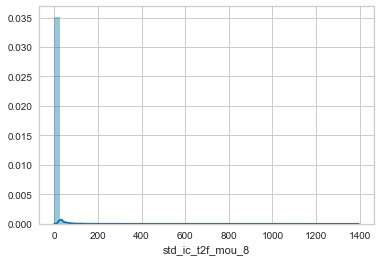

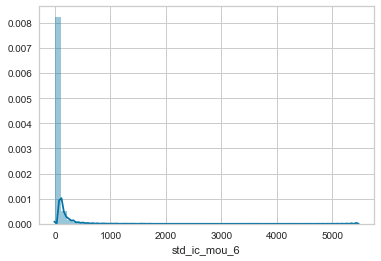

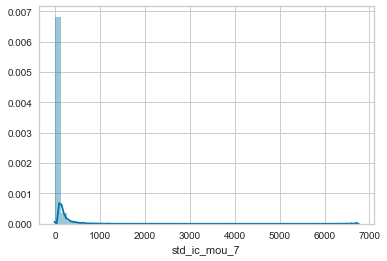

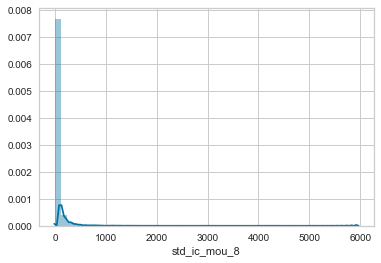

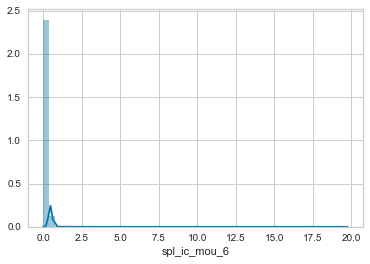

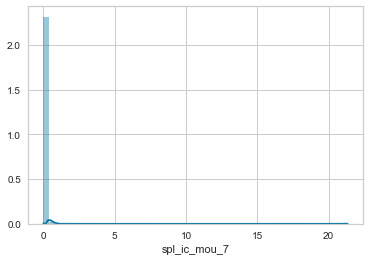

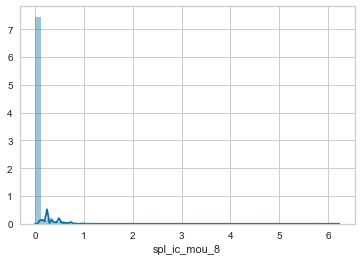

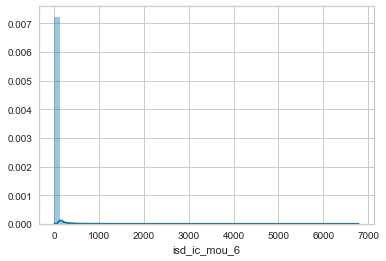

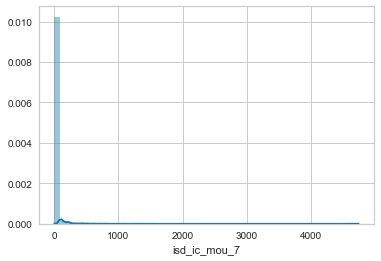

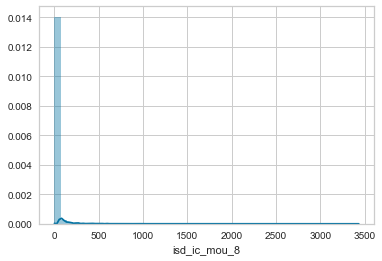

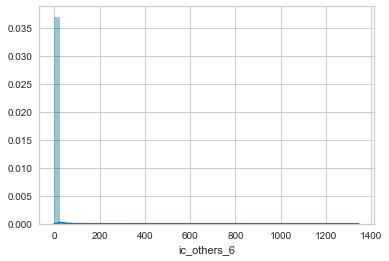

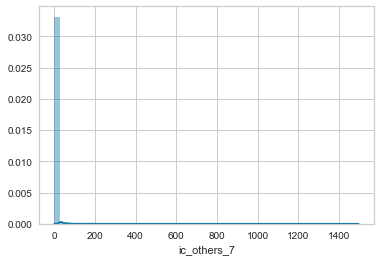

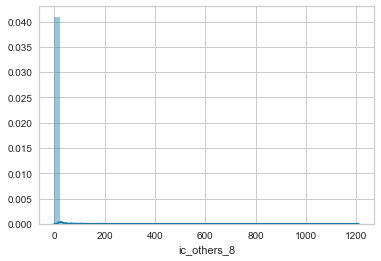

In [676]:
#Checking the distribution of all variables
for i in cc:
    sns.distplot(df_c[df_c[i].notna()][i])
    plt.show()

In [677]:
#since there are only ~4% columns with nan values, and all are right skewed curves
#it would be better to impute with medians
df_imp = df_c.fillna(df_c.median())
print(max((df_imp.isnull().sum()/len(df_imp.index) )*100))

0.0


In [678]:
df_imp.shape

(29953, 132)

## Data Manipulation and digging

In [679]:
#checking the data for 6th month
six_month = [x for x in df_imp.columns if ((x[-2:]=='_6'))]
six_month

['arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'last_day_rch_amt_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'total_data_rech_amt_6']

In [680]:
#Let's now see the relation between loc_*_*_mou_6 with loc_*_mou_6 and similarly std

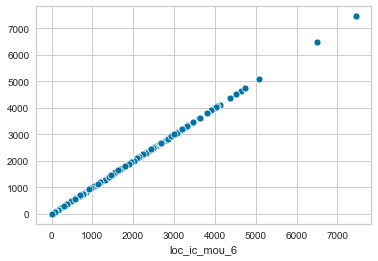

In [681]:
total_local_ic_6 = df_imp['loc_ic_t2t_mou_6']+df_imp['loc_ic_t2m_mou_6']+df_imp['loc_ic_t2f_mou_6']
sns.scatterplot(df_imp['loc_ic_mou_6'],total_local_ic_6)

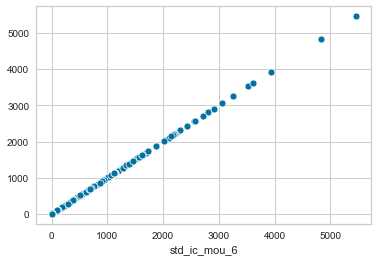

In [682]:
total_std_ic_6 = df_imp['std_ic_t2t_mou_6']+df_imp['std_ic_t2m_mou_6']+df_imp['std_ic_t2f_mou_6']
sns.scatterplot(df_imp['std_ic_mou_6'],total_std_ic_6)

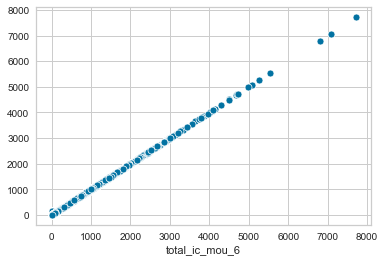

In [683]:
total_ic_6 = df_imp['loc_ic_mou_6']+df_imp['std_ic_mou_6']+df_imp['isd_ic_mou_6']+df_imp['spl_ic_mou_6']+df_imp['ic_others_6']
sns.scatterplot(df_imp['total_ic_mou_6'],total_ic_6)

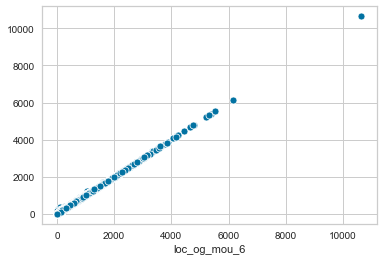

In [684]:
total_local_out_6 = df_imp['loc_og_t2t_mou_6']+df_imp['loc_og_t2m_mou_6']+df_imp['loc_og_t2f_mou_6']+df_imp['loc_og_t2c_mou_6']
sns.scatterplot(df_imp['loc_og_mou_6'],total_local_out_6)

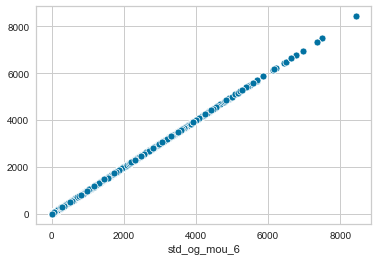

In [685]:
total_std_out_6 = df_imp['std_og_t2t_mou_6']+df_imp['std_og_t2m_mou_6']+df_imp['std_og_t2f_mou_6']
sns.scatterplot(df_imp['std_og_mou_6'],total_std_out_6)

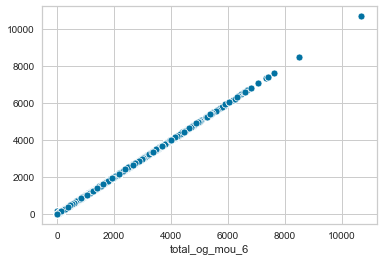

In [686]:
total_out_6 = df_imp['loc_og_mou_6']+df_imp['std_og_mou_6']+df_imp['isd_og_mou_6']+df_imp['spl_og_mou_6']+df_imp['og_others_6']
sns.scatterplot(df_imp['total_og_mou_6'],total_out_6)

In [687]:
#We can clearly see that columns, total_og_mou_6,std_og_mou_6,loc_og_mou_6,total_ic_mou_6,std_ic_mou_6,loc_ic_mou_6
#are linear combinations of existing columns
#Thus we can easily drop them
df_imp.drop(['total_og_mou_6','total_og_mou_7','total_og_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8',
             'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
             'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8'],
            axis=1,inplace =True)
df_imp.shape

(29953, 114)

In [688]:
#Also drop total recharge amount
df_imp.drop(['total_rech_amt'], axis=1,inplace =True)

In [689]:
df_imp.dtypes.astype('category').value_counts()

float64    87
int64      26
dtype: int64

In [690]:
list(df_imp.columns)

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 

## Outlier analysis

1815.1932799999984


Text(0.5, 0, 'avg. rev per user')

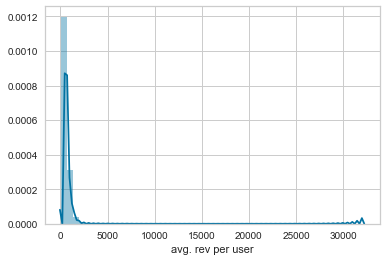

In [691]:
#let's check how many users are the top 1% users
top1 = (df_imp['arpu_6'] + df_imp['arpu_7'] + df_imp['arpu_8'])/3
print(np.percentile(top1, 99))
sns.distplot(top1)
plt.xlabel('avg. rev per user')

In [692]:
#Here it seems that there are some customers in above range also, we will proceed without removing any outliers.

## Checking Data Imbalance

In [285]:
print('Churned',100.0*len(df_imp[df_imp['churned']==1])/len(df_imp.index))

Churned 8.122725603445398


## Splitting test-train data

In [693]:
from sklearn.model_selection import train_test_split
X = df_imp.drop(['churned'],axis=1)
y = df_imp['churned']
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [694]:
#Scaling the training the data 
## doing standard scaling
st_sc = StandardScaler()
# applying standard scaler
X_train_sc = st_sc.fit_transform(X_train)
X_test_sc = st_sc.transform(X_test)
X_train_sc[:5,:]

array([[ 2.56060807e-02,  6.35837945e-01,  2.85055890e-01,
        -1.02602703e-01, -1.45862762e-01, -1.97455290e-01,
         4.06424285e-01,  7.65799019e-01,  1.78157131e+00,
         3.10671074e+00,  6.55208835e+00, -1.61348267e-01,
         3.17599489e+00,  7.58183503e+00, -1.98864892e-01,
        -3.36388868e-01, -2.86830935e-01, -2.57098799e-02,
        -4.14978000e-01, -6.09274411e-01,  1.38809477e-01,
         1.73901517e+00, -2.35004924e-01,  8.43170991e-03,
        -2.45963326e-01, -9.00421810e-02,  8.93426061e-01,
        -4.16010058e-02, -3.12206061e-01, -1.86476782e-01,
        -1.44817911e-01, -1.45016229e-01,  1.90729754e+00,
        -3.03396629e-02, -1.38957480e-01,  4.46570254e+00,
        -4.32729835e-02, -4.28159511e-02,  5.54685773e-02,
        -3.24782386e-01, -2.66843655e-01,  9.15376988e-02,
         5.58039286e-02, -2.29744340e-02, -1.66895403e-02,
        -4.02446324e-01, -4.08409730e-01, -4.15215240e-01,
        -1.33746908e-01, -5.63373102e-01, -3.31971989e-0

## Using PCA

In [695]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42,svd_solver='auto')

In [696]:
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [697]:
pca.components_

array([[ 2.25272370e-01,  2.39533598e-01,  2.27457955e-01, ...,
        -6.92335745e-02, -8.22140572e-02, -5.91652749e-02],
       [ 8.22774307e-02,  9.30817361e-02,  1.12649998e-01, ...,
         1.14031454e-01,  1.27855120e-01,  1.18372943e-01],
       [ 1.00635624e-01,  1.27075719e-01,  1.24253399e-01, ...,
         1.62941466e-01,  1.98658376e-01,  1.92034895e-01],
       ...,
       [-5.41390586e-03,  7.53932595e-03,  1.31687245e-02, ...,
         2.15153319e-03, -2.75899689e-04, -8.43870485e-04],
       [-5.18406122e-03, -2.20529949e-03,  1.02557416e-02, ...,
         4.86740812e-04,  1.51976896e-04, -9.21389056e-04],
       [ 5.84569023e-03, -7.01977773e-03,  7.04835730e-04, ...,
        -1.29839973e-03,  1.14627533e-03, -5.12993556e-04]])

In [698]:
#Let's check the explained variance ratio
pca.explained_variance_ratio_

array([8.98559253e-02, 7.27297887e-02, 5.21175360e-02, 4.13614651e-02,
       3.94022623e-02, 3.26430891e-02, 3.04796814e-02, 2.86666044e-02,
       2.74399587e-02, 2.57771124e-02, 2.44009971e-02, 2.37435965e-02,
       2.23945613e-02, 2.12924081e-02, 1.94805853e-02, 1.83442389e-02,
       1.70508853e-02, 1.66391207e-02, 1.58149327e-02, 1.51807483e-02,
       1.50656436e-02, 1.36758827e-02, 1.18645226e-02, 1.15733396e-02,
       1.08662493e-02, 1.06980446e-02, 1.02657013e-02, 9.90351950e-03,
       9.78674799e-03, 9.46327442e-03, 9.07878457e-03, 8.91140209e-03,
       8.40376686e-03, 8.09568546e-03, 7.89713053e-03, 7.71552874e-03,
       7.42593212e-03, 7.36354643e-03, 7.29563062e-03, 7.17656549e-03,
       6.79831456e-03, 6.65985709e-03, 6.24499779e-03, 6.07948844e-03,
       5.87058115e-03, 5.44268612e-03, 5.18657516e-03, 4.92017496e-03,
       4.72829969e-03, 4.63296176e-03, 4.28177864e-03, 4.18083075e-03,
       4.07440781e-03, 3.91737887e-03, 3.80498893e-03, 3.56852059e-03,
      

[0.08985593 0.16258571 0.21470325 0.25606472 0.29546698 0.32811007
 0.35858975 0.38725635 0.41469631 0.44047342 0.46487442 0.48861802
 0.51101258 0.53230499 0.55178557 0.57012981 0.5871807  0.60381982
 0.61963475 0.6348155  0.64988114 0.66355702 0.67542155 0.68699489
 0.69786114 0.70855918 0.71882488 0.7287284  0.73851515 0.74797842
 0.75705721 0.76596861 0.77437238 0.78246806 0.79036519 0.79808072
 0.80550665 0.8128702  0.82016583 0.8273424  0.83414071 0.84080057
 0.84704557 0.85312505 0.85899564 0.86443832 0.8696249  0.87454507
 0.87927337 0.88390633 0.88818811 0.89236894 0.89644335 0.90036073
 0.90416572 0.90773424 0.91122186 0.9146731  0.91779586 0.92089419
 0.92391751 0.92685156 0.92973954 0.93252912 0.93525254 0.93796397
 0.94060209 0.94321008 0.9456942  0.94814508 0.95055944 0.95291683
 0.95520464 0.9574373  0.9596448  0.96178248 0.96390264 0.96598186
 0.9679735  0.96992354 0.97183917 0.97374766 0.9756098  0.97741742
 0.979146   0.98080204 0.98240766 0.9839847  0.98552575 0.9870

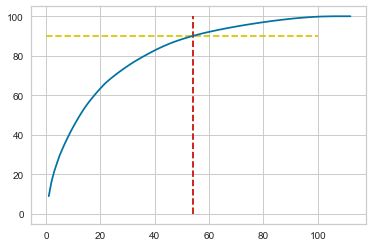

In [699]:
#Finding the cumulative explained variance ratio
cumu_var = np.cumsum(pca.explained_variance_ratio_)
print(cumu_var)

#Scree plot

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,len(cumu_var)+1), cumu_var*100)
plt.vlines(54,0,100,colors='r',linestyles='--')
plt.hlines(90,0,100,colors='y',linestyles='--')

In [700]:
#From the scree plot it can be clearly seen that with 54 PC's we are reaching >90% information
#we can keep the PC count to 54
pca54 = PCA(n_components=54,random_state=42,svd_solver='auto')

In [701]:
X_train_pca=pca54.fit_transform(X_train_sc)
X_test_pca=pca54.transform(X_test_sc)
X_train_pca.shape

(20967, 54)

In [702]:
#Let's look on class imbalance
100.0*len(y_train[y_train==1])/len(y_train.index)

8.355987981113177

In [703]:
#balancing the data using imblearn SMOTE as only about 8% target is positive
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_smote, y_train_smote = sm.fit_sample(X_train_pca, y_train.ravel()) 

In [704]:
len(y_train_smote[y_train_smote==1])/len(y_train_smote)

0.5

In [705]:
#Now our training data is equally partitioned in churn categories
y_train_smote

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

###  logistic regression

In [706]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer,precision_recall_curve
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,make_scorer
from sklearn.model_selection import GridSearchCV

In [707]:
#Baseline model
LR = LogisticRegression()
LR.fit(X_train_smote, y_train_smote)
predictions   = LR.predict(X_train_smote)
probabilities = LR.predict_proba(X_train_smote)

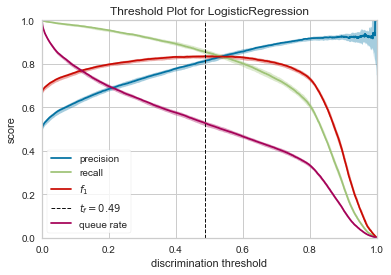

In [708]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(LR)

visualizer.fit(X_train_smote, y_train_smote)        # Fit the data to the visualizer
visualizer.show()  

In [709]:
print ("\n Classification report : \n",classification_report(y_train_smote,predictions))
print ("Accuracy   Score : ",accuracy_score(y_train_smote,predictions))
#confusion matrix
print("conf_matrix = ", confusion_matrix(y_train_smote,predictions))
#roc_auc_score  
print ("Area under curve : ",roc_auc_score(y_train_smote,predictions),"\n")


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83     19215
           1       0.82      0.85      0.83     19215

    accuracy                           0.83     38430
   macro avg       0.83      0.83      0.83     38430
weighted avg       0.83      0.83      0.83     38430

Accuracy   Score :  0.8309133489461358
conf_matrix =  [[15597  3618]
 [ 2880 16335]]
Area under curve :  0.8309133489461358 



#### Since we are more interested in predicting the churned customers correctly, so
#### we should focus more on recall metric

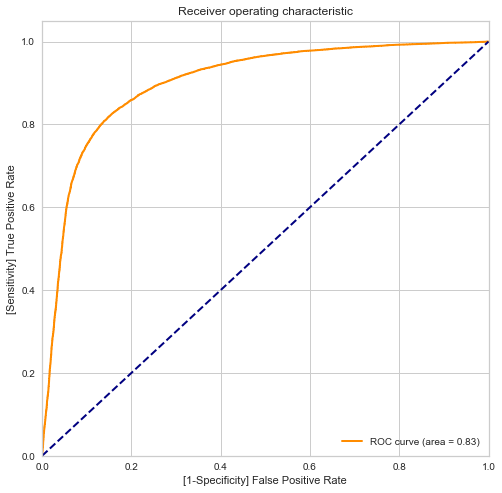

In [710]:
#getting the ROC curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_train_smote, probabilities[:,1])
roc_auc = roc_auc_score(y_train_smote,predictions)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('[1-Specificity] False Positive Rate')
plt.ylabel('[Sensitivity] True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Applying on test data

In [711]:
X_test_pca.shape

(8986, 54)

In [712]:
test_pred=LR.predict(X_test_pca)

In [713]:
print ("\n Classification report : \n",classification_report(y_test,test_pred))
print ("Accuracy   Score : ",accuracy_score(y_test,test_pred))
#confusion matrix
print("conf_matrix = ", confusion_matrix(y_test,test_pred))
#roc_auc_score  
print ("Area under curve : ",roc_auc_score(y_test,test_pred),"\n")


 Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      8305
           1       0.26      0.83      0.39       681

    accuracy                           0.81      8986
   macro avg       0.62      0.82      0.64      8986
weighted avg       0.93      0.81      0.85      8986

Accuracy   Score :  0.8050300467393724
conf_matrix =  [[6668 1637]
 [ 115  566]]
Area under curve :  0.8170102577839544 



In [714]:
#Here also we see that recall for churned category is pretty good.

## Hypertuning the parameters for logistic regression using GridSearchCV for best model


In [715]:
logit = LogisticRegression()
from sklearn.model_selection import StratifiedKFold

In [716]:
params = {'C': [0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2'], 'random_state' : [100]}
# Create 5 folds
folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 4)
scorer={'recall_score': make_scorer(recall_score)}
# Create GridSearchCV object
model = GridSearchCV(estimator=logit, cv=folds, param_grid=params, scoring=scorer, refit='recall_score',
                     n_jobs=-1,verbose=1)


In [717]:
# Fit the model
model.fit(X_train_smote, y_train_smote)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.3, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2'], 'random_state': [100]},
             pre_dispatch='2*n_jobs', refit='recall_score',
             return_train_score=False,
             scoring={'recall_score'

In [718]:
# Cross-Validation Results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_random_state,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,split5_test_recall_score,split6_test_recall_score,split7_test_recall_score,split8_test_recall_score,split9_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
0,7.348321,1.196431,0.013665,0.005138,0.1,l1,100,"{'C': 0.1, 'penalty': 'l1', 'random_state': 100}",0.850156,0.843392,0.847555,0.847555,0.864724,0.859969,0.844872,0.853201,0.841749,0.845393,0.849857,0.007053,8
1,3.321183,0.286427,0.004589,0.000489,0.1,l2,100,"{'C': 0.1, 'penalty': 'l2', 'random_state': 100}",0.850676,0.842352,0.847555,0.848075,0.866285,0.859969,0.844872,0.853201,0.841749,0.845914,0.850065,0.007447,1
2,6.314046,0.623588,0.007239,0.003801,0.3,l1,100,"{'C': 0.3, 'penalty': 'l1', 'random_state': 100}",0.850676,0.842872,0.847555,0.848075,0.866285,0.859448,0.844352,0.853201,0.841749,0.845393,0.849961,0.007395,2
3,3.464611,0.206437,0.005506,0.002127,0.3,l2,100,"{'C': 0.3, 'penalty': 'l2', 'random_state': 100}",0.850676,0.842352,0.847034,0.847555,0.865765,0.859448,0.844352,0.853201,0.841749,0.845914,0.849805,0.007336,12
4,7.185382,1.685708,0.003117,0.003789,0.5,l1,100,"{'C': 0.5, 'penalty': 'l1', 'random_state': 100}",0.850676,0.842872,0.847555,0.847555,0.866285,0.858928,0.844352,0.853201,0.841749,0.845393,0.849857,0.007344,8
5,3.488213,0.241760,0.005536,0.004115,0.5,l2,100,"{'C': 0.5, 'penalty': 'l2', 'random_state': 100}",0.850676,0.842352,0.847034,0.847555,0.865245,0.859969,0.844352,0.853201,0.841749,0.846434,0.849857,0.007268,8
6,10.483237,1.658307,0.006261,0.004460,1,l1,100,"{'C': 1, 'penalty': 'l1', 'random_state': 100}",0.850676,0.842872,0.847034,0.847555,0.865765,0.859448,0.844352,0.852681,0.841749,0.845393,0.849753,0.007291,13
7,3.895545,0.352891,0.004319,0.003565,1,l2,100,"{'C': 1, 'penalty': 'l2', 'random_state': 100}",0.850156,0.842352,0.847034,0.847555,0.865765,0.859969,0.844352,0.853201,0.841749,0.846434,0.849857,0.007375,8
8,12.943895,2.021042,0.005367,0.002998,2,l1,100,"{'C': 2, 'penalty': 'l1', 'random_state': 100}",0.850676,0.842872,0.847034,0.847555,0.865245,0.859448,0.844352,0.852681,0.841749,0.845914,0.849753,0.007148,13
9,3.986605,0.228165,0.005196,0.002494,2,l2,100,"{'C': 2, 'penalty': 'l2', 'random_state': 100}",0.850156,0.842352,0.847555,0.847555,0.865765,0.859969,0.844352,0.853201,0.842270,0.845914,0.849909,0.007328,3


In [719]:
# Print Best Score
print("Best recall score: ", model.best_score_)
# Print Best Hyperparameters
print("Best Hyperparameters: ", model.best_params_)

Best recall score:  0.8500650533437418
Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'random_state': 100}


In [720]:
#let's get the probabilities for finding optimal cutoff according to recall
proba = pd.DataFrame(model.predict_proba(X_train_smote)[:,1],columns=['pro'])
proba.head()

,pro
0,0.069035
1,0.896021
2,0.221711
3,0.226399
4,0.013862


### Precision Recall curve

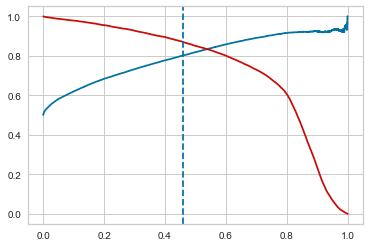

38385


In [721]:
p, r, thresholds = precision_recall_curve(y_train_smote, proba['pro'])
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.46,linestyle='--')
plt.show()
print(len(thresholds))

In [722]:
proba['cut_0.46'] = proba['pro'].map(lambda x: 1 if x > 0.46 else 0)
con_mat = metrics.confusion_matrix(y_train_smote, proba['cut_0.46'])
recall = con_mat[1,1]/(con_mat[1,0]+con_mat[1,1])
precision = con_mat[1,1]/(con_mat[0,1]+con_mat[1,1])
print('recall = ', recall,'precision = ',precision)

recall =  0.8695290137913089 precision =  0.8019968319493112


In [723]:
#We are getting a good recall and precision using threshold of 0.46

## Predict churn on test data

In [724]:
#Getting the predicted_probabilities for rest data
proba_test = pd.DataFrame(model.predict_proba(X_test_pca)[:,1],columns=['pro'])
y_pred_grid = proba_test['pro'].map(lambda x: 1 if x > 0.46 else 0)

In [725]:
# Create confusion matrix
confusion = confusion_matrix(y_test, y_pred_grid)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculating Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_grid),2)*100)
# Calculating Sensitivity/recall
print("recall:",round(TP/(TP+FN),2)*100)
# Calculating AUC Score

print("AUC Score:",round(roc_auc_score(y_test, proba_test['pro']),2)*100)

[[6435 1870]
 [ 103  578]]
Accuracy: 78.0
recall: 85.0
AUC Score: 88.0


In [726]:
# Thus we are getting a fairly decent model after applying gridsearch
# the final model name is 'model' and we are considering a threshold of 0.46 for classifying as a churn
# We can trade-off it with the accuracy of overall model as customer retention is more important.

## Feature Importance using Random Forest

In [727]:
#balancing the training data using imblearn SMOTE as only about 8% target is positive 
sm = SMOTE(random_state = 2) 
X_train_rf_smote, y_train_rf_smote = sm.fit_sample(X_train, y_train) 
print('ratio:',len(y_train_rf_smote[y_train_rf_smote==1])/len(y_train_rf_smote))

ratio: 0.5


In [728]:
# Features for feature importances
features = list(X_train.columns)

param_grid = {
    'min_samples_leaf': range(100, 399, 100),
    'min_samples_split': range(200, 600, 200), 
    'n_estimators':range(80,150 , 30),
    'max_depth': [3, 5, 8, 10],
    'max_features': [8, 10,12,15]
}
# Create the model
rf = RandomForestClassifier(oob_score = True,random_state =50)
#for recall metric
scorer1={'recall_score': make_scorer(recall_score)}


In [729]:
rf_grid =GridSearchCV(rf, param_grid, scoring=scorer1,refit='recall_score',cv = 5, n_jobs = -1,verbose = 1)

In [618]:
rf_grid.fit(X_train_rf_smote, y_train_rf_smote)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 52.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 64.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Tr...
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8

In [620]:
# Cross-Validation Results
pd.DataFrame(rf_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
0,6.571831,0.145415,0.164959,0.004397,3,8,100,200,80,"{'max_depth': 3, 'max_features': 8, 'min_sampl...",0.793391,0.833203,0.826958,0.826958,0.834244,0.822951,0.015090,278
1,9.183250,0.463366,0.177329,0.011552,3,8,100,200,110,"{'max_depth': 3, 'max_features': 8, 'min_sampl...",0.786365,0.826177,0.821754,0.825917,0.833724,0.818787,0.016665,283
2,11.584430,0.269759,0.247942,0.018390,3,8,100,200,140,"{'max_depth': 3, 'max_features': 8, 'min_sampl...",0.795733,0.832683,0.824616,0.828780,0.836846,0.823731,0.014576,273
3,6.818769,0.141658,0.133843,0.019740,3,8,100,400,80,"{'max_depth': 3, 'max_features': 8, 'min_sampl...",0.793391,0.836846,0.829040,0.826958,0.835025,0.824252,0.015858,272
4,9.501801,0.225788,0.172136,0.010059,3,8,100,400,110,"{'max_depth': 3, 'max_features': 8, 'min_sampl...",0.787406,0.825917,0.820973,0.825917,0.833724,0.818787,0.016213,283
5,12.105038,0.243921,0.216820,0.017476,3,8,100,400,140,"{'max_depth': 3, 'max_features': 8, 'min_sampl...",0.795733,0.833724,0.826177,0.829820,0.837106,0.824512,0.014851,271
6,7.125948,0.164078,0.142418,0.025556,3,8,200,200,80,"{'max_depth': 3, 'max_features': 8, 'min_sampl...",0.793651,0.833984,0.828259,0.827479,0.833984,0.823471,0.015161,276
7,9.937233,0.433488,0.211036,0.022879,3,8,200,200,110,"{'max_depth': 3, 'max_features': 8, 'min_sampl...",0.786625,0.825397,0.819672,0.825657,0.833724,0.818215,0.016417,285
8,12.244665,0.348221,0.228189,0.033539,3,8,200,200,140,"{'max_depth': 3, 'max_features': 8, 'min_sampl...",0.794171,0.832423,0.824616,0.829560,0.837627,0.823679,0.015344,274
9,7.198156,0.150963,0.149800,0.007475,3,8,200,400,80,"{'max_depth': 3, 'max_features': 8, 'min_sampl...",0.793651,0.833984,0.828259,0.827479,0.833984,0.823471,0.015161,276


In [621]:
print('We can get recall of',rf_grid.best_score_,'using',rf_grid.best_params_)

We can get recall of 0.8927920895134009 using {'max_depth': 8, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 80}


In [622]:
#Test data evaluation

predictions =rf_grid.predict(X_test)
# evaluationmetrics
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8305
           1       0.40      0.75      0.53       681

    accuracy                           0.90      8986
   macro avg       0.69      0.83      0.73      8986
weighted avg       0.93      0.90      0.91      8986

[[7548  757]
 [ 169  512]]


In [ ]:
#Thus the recall for target class is 75% for the best model it gives

#### Trying with different parameter ranges

In [540]:
param_grid1 = {
    'min_samples_leaf': [25,50,150],
    'min_samples_split': [50,150,300], 
    'n_estimators' : [100,200, 300],
    'max_depth': [3, 5,11, 15]
}

In [541]:
clf = RandomForestClassifier(oob_score = True,max_features=15)
skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(clf, param_grid1, scoring=scorer1, refit='recall_score',
                           cv=skf, return_train_score=True, n_jobs=-1,verbose=1)

In [542]:
grid_search.fit(X_train_rf_smote, y_train_rf_smote)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 64.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=15,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction...
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=True, random_state=None,
                                              verbose=0, warm_start=False),
 

In [730]:
#Cross validation results
gg=pd.DataFrame(grid_search.cv_results_)
gg

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,mean_train_recall_score,std_train_recall_score
0,13.999574,0.197900,0.186901,0.009985,3,25,50,100,"{'max_depth': 3, 'min_samples_leaf': 25, 'min_...",0.812907,0.858964,0.837627,0.856622,0.852199,0.843664,0.017072,84,0.860265,0.845238,0.838277,0.840099,0.842701,0.845316,0.007837
1,33.327700,0.666362,0.306381,0.013357,3,25,50,200,"{'max_depth': 3, 'min_samples_leaf': 25, 'min_...",0.809003,0.853500,0.839448,0.851678,0.855061,0.841738,0.017271,93,0.861306,0.844067,0.837041,0.834439,0.848100,0.844991,0.009500
2,45.986060,1.563621,0.481712,0.033892,3,25,50,300,"{'max_depth': 3, 'min_samples_leaf': 25, 'min_...",0.804059,0.849597,0.832683,0.857663,0.855321,0.839865,0.019920,105,0.856753,0.840554,0.831772,0.837106,0.849532,0.843143,0.008927
3,14.835539,0.345745,0.167751,0.034464,3,25,150,100,"{'max_depth': 3, 'min_samples_leaf': 25, 'min_...",0.799636,0.854801,0.842050,0.856622,0.850638,0.840749,0.021162,100,0.851808,0.844067,0.838928,0.836911,0.839709,0.842285,0.005304
4,29.639560,0.787615,0.360835,0.037622,3,25,150,200,"{'max_depth': 3, 'min_samples_leaf': 25, 'min_...",0.815509,0.851158,0.842571,0.853760,0.849597,0.842519,0.014005,88,0.865730,0.838993,0.841725,0.836196,0.842050,0.844939,0.010609
5,43.540795,0.853448,0.444412,0.017533,3,25,150,300,"{'max_depth': 3, 'min_samples_leaf': 25, 'min_...",0.800937,0.848816,0.844132,0.853240,0.858444,0.841114,0.020640,98,0.850572,0.840619,0.840554,0.837887,0.850703,0.844067,0.005455
6,14.842718,0.231541,0.166755,0.005897,3,25,300,100,"{'max_depth': 3, 'min_samples_leaf': 25, 'min_...",0.810565,0.854281,0.846995,0.854020,0.849597,0.843091,0.016494,87,0.861762,0.846864,0.846149,0.837822,0.843872,0.847294,0.007902
7,29.415359,0.421583,0.286835,0.009866,3,25,300,200,"{'max_depth': 3, 'min_samples_leaf': 25, 'min_...",0.796513,0.852459,0.844392,0.854541,0.847255,0.839032,0.021564,106,0.844978,0.843026,0.840229,0.837367,0.836651,0.840450,0.003198
8,44.204023,1.146737,0.453189,0.025347,3,25,300,300,"{'max_depth': 3, 'min_samples_leaf': 25, 'min_...",0.806922,0.850898,0.848816,0.849597,0.850377,0.841322,0.017215,96,0.859160,0.841465,0.847645,0.835155,0.841790,0.845043,0.008090
9,14.858874,0.621056,0.163563,0.018389,3,50,50,100,"{'max_depth': 3, 'min_samples_leaf': 50, 'min_...",0.810304,0.848556,0.846995,0.844392,0.852719,0.840593,0.015384,102,0.860461,0.840164,0.845238,0.827544,0.845498,0.843781,0.010583


In [731]:
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.9274525110590685 using {'max_depth': 15, 'min_samples_leaf': 25, 'min_samples_split': 50, 'n_estimators': 200}


In [732]:
#Test data evaluation

predictions =grid_search.predict(X_test)
# evaluation metrics
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      8305
           1       0.48      0.72      0.58       681

    accuracy                           0.92      8986
   macro avg       0.73      0.83      0.77      8986
weighted avg       0.94      0.92      0.93      8986

[[7775  530]
 [ 191  490]]


### From the different random forests built ( [grid_search] and [rf_grid] objects ), we see that max recall for interested class(churned) is around 75% for the test data and we can get recall of 89.3% for training data 


In [745]:
# Fitting the final model with the best parameters obtained from grid search ==> rf_grid as 
# grid_search object(2nd model) was less optimal.

#'max_depth': 8, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 80
rfc =RandomForestClassifier(bootstrap=True, max_depth=8, oob_score = True, min_samples_leaf=100,
                            min_samples_split=200, max_features=15, n_estimators=200)

In [746]:
rfc.fit(X_train_rf_smote,y_train_rf_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

### Checking on the test data

In [747]:
predictions =rfc.predict(X_test)
# evaluationmetrics
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8305
           1       0.40      0.75      0.52       681

    accuracy                           0.90      8986
   macro avg       0.69      0.83      0.73      8986
weighted avg       0.93      0.90      0.91      8986

[[7542  763]
 [ 172  509]]


In [748]:
#Thus we get a good mix of accuracy and recall, let's see if we can improve the recall

### Optimal Threshold Cut: Precision-Recall curve 

In [749]:
#let's get the probabilities for finding optimal cutoff according to recall
proba_rfc = pd.DataFrame(rfc.predict_proba(X_train_rf_smote)[:,1],columns=['pro'])
proba_rfc.head()

,pro
0,0.123135
1,0.896627
2,0.103881
3,0.047260
4,0.151245


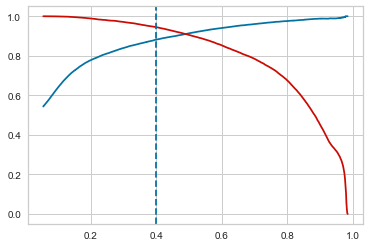

33741


In [750]:
p, r, thresholds = precision_recall_curve(y_train_rf_smote, proba_rfc['pro'])
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.40,linestyle='--')
plt.show()
print(len(thresholds))

In [751]:
proba_rfc['cut_0.40'] = proba_rfc['pro'].map(lambda x: 1 if x > 0.40 else 0)
con_mat = metrics.confusion_matrix(y_train_rf_smote, proba_rfc['cut_0.40'])
recall = con_mat[1,1]/(con_mat[1,0]+con_mat[1,1])
precision = con_mat[1,1]/(con_mat[0,1]+con_mat[1,1])
print('recall = ', recall,'precision = ',precision)

recall =  0.9444704657819412 precision =  0.8819984447900466


In [752]:
# We see, it is fairly good to have a cut at 0.40 as both recall and precision are above 0.8 in the test data

### Checking again on test data for 0.40 threshold

In [753]:
proba_rfc_test = pd.DataFrame(rfc.predict_proba(X_test)[:,1],columns=['pro'])
y_pred_rfc = proba_rfc_test['pro'].map(lambda x: 1 if x > 0.40 else 0)

In [754]:
# Create confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculating Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred_rfc),2)*100)
# Calculating Sensitivity/recall
print("recall:",round(TP/(TP+FN),2)*100)
# Calculating AUC Score

print("AUC Score:",round(roc_auc_score(y_test, proba_rfc_test['pro']),2)*100)

[[7186 1119]
 [ 123  558]]
Accuracy: 86.0
recall: 82.0
AUC Score: 92.0


In [755]:
# This model with 0.40 as cutoff threshold is performing very good on test data as well.

## Feature importance using Random Forest

In [756]:
#making a dataframe of attributes and their respective importance and std dev from various ensembles
feature_importance=pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_*100), features), reverse=True),
                                columns=['importance','name'])
feature_importance['std'] = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
print("Sorted Feature ranking:")
feature_importance

Sorted Feature ranking:


,importance,name,std
0,9.7946,total_rech_amt_8,0.001496
1,9.6913,arpu_8,0.001586
2,8.6227,roam_og_mou_8,0.157145
3,8.6086,roam_ic_mou_8,0.002665
4,7.8406,fb_user_8,0.004812
5,7.0455,max_rech_amt_8,0.024403
6,6.5323,last_day_rch_amt_8,0.001365
7,4.4541,loc_ic_t2m_mou_8,0.001274
8,4.2615,total_rech_num_8,0.018585
9,3.6601,total_data_rech_amt_8,0.004248


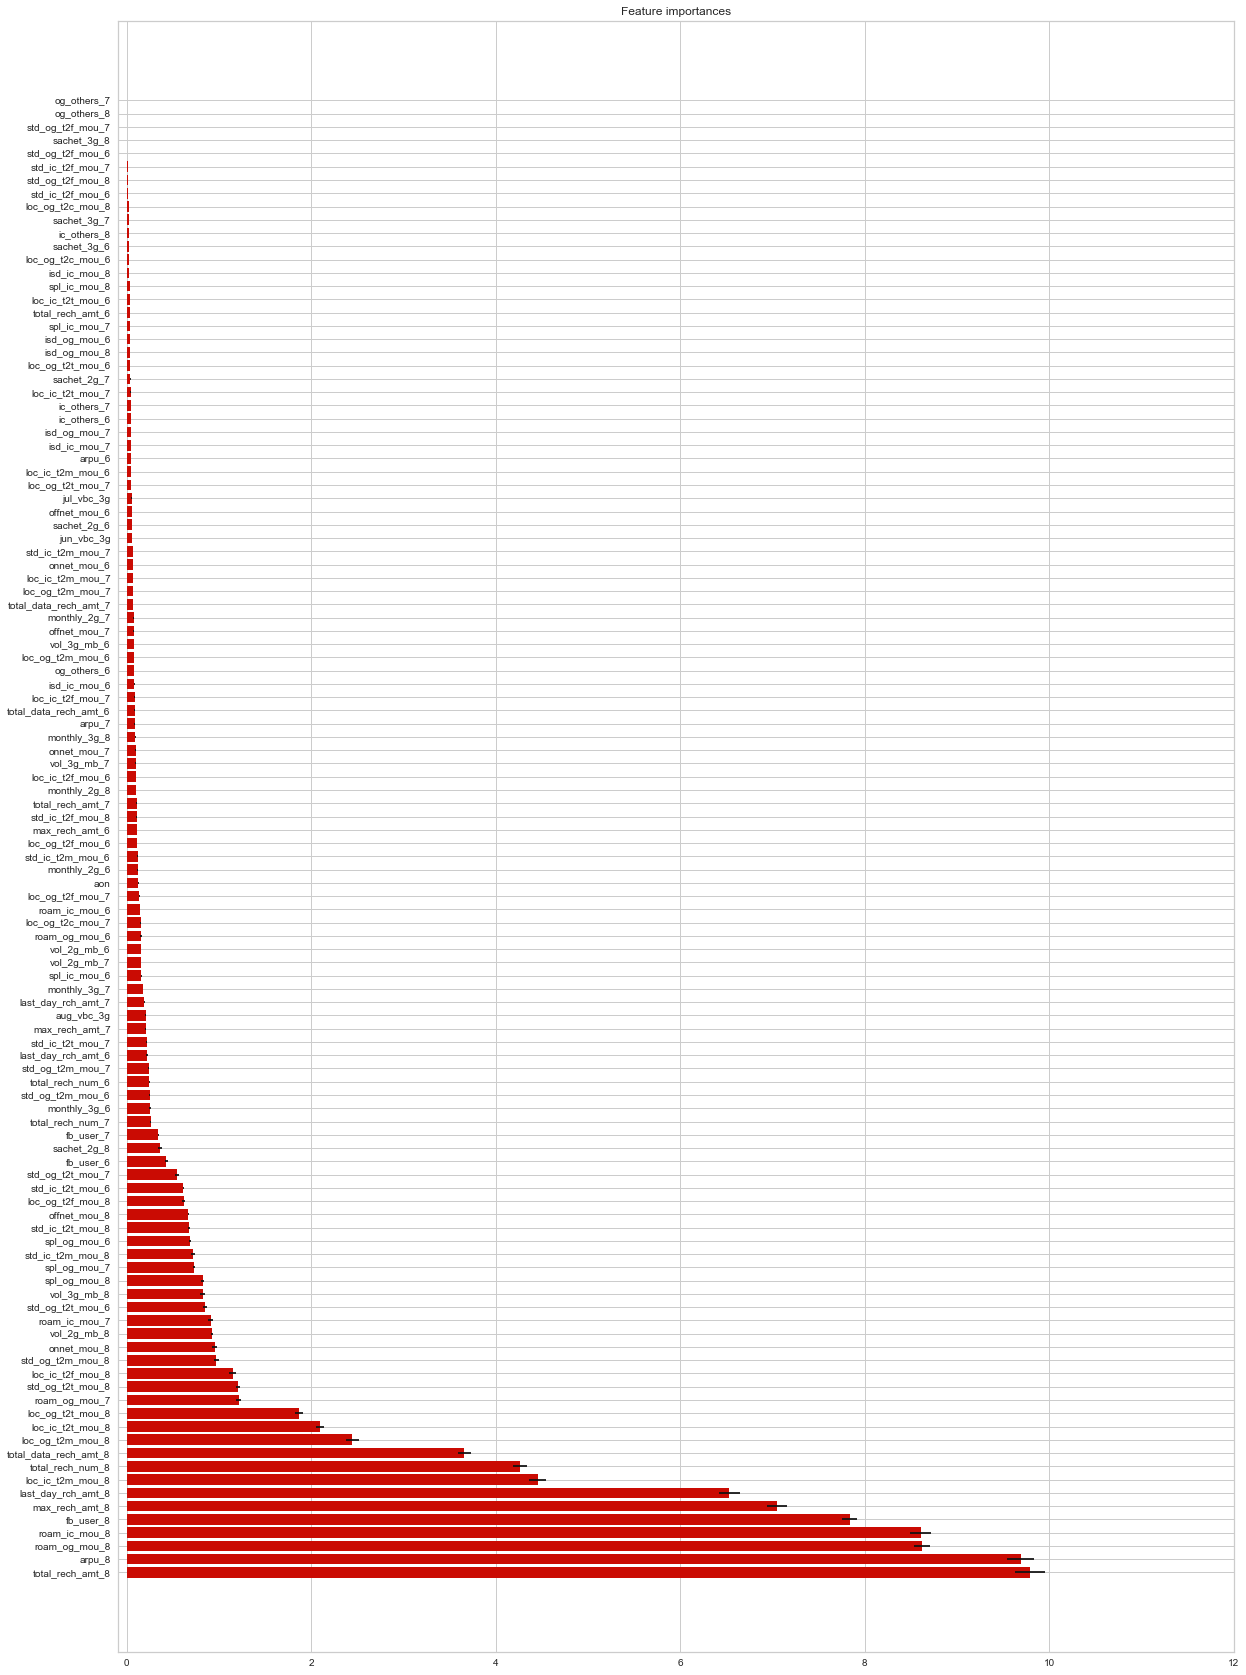

In [757]:
# Plot the feature importances of the forest
plt.figure(figsize=(20,30))
plt.title("Feature importances")
plt.barh(feature_importance['name'], feature_importance['importance'],
       color="r", xerr=std[indices], align="center")
plt.xlim([-0.1, 12])
plt.show()

In [758]:
# Most of the features are related to the action month variables(month 8)

In [764]:
## Taking the top 10 features for analysing (which also happen to be above 3% for importance) [loc_og_t2m_mou_8]
feature_importance[['importance','name']][:10]

,importance,name
0,9.7946,total_rech_amt_8
1,9.6913,arpu_8
2,8.6227,roam_og_mou_8
3,8.6086,roam_ic_mou_8
4,7.8406,fb_user_8
5,7.0455,max_rech_amt_8
6,6.5323,last_day_rch_amt_8
7,4.4541,loc_ic_t2m_mou_8
8,4.2615,total_rech_num_8
9,3.6601,total_data_rech_amt_8


## Based on above results, we can conclude following points:
#### 1. Telecom company needs to focus on roaming rates and to provide good offers to the customers who are using roaming services.
#### 2. Telecom company needs to focus on the STD and ISD rates as rates maybe too high and should provide them with good STD and ISD packages.
#### 3. Telecom company could provide better price on Internet packs for fb users
#### 4. Telecom company should focus on collecting customer queries as well as complaints and improve their services as per the customer needs.
#### 5. Also they should follow the customers who have reduced/stopped recharging in this month